## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
cifar10 = cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

# Check dimensions of an image
print('Dimensions of 1 image: ',test_images[0].shape)
print(np.unique(test_labels))
print(test_labels)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Dimensions of 1 image:  (32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [25]:
test_images[0].shape


(32, 32, 3)

In [29]:
len(np.unique(train_labels))

10

In [30]:
classifier = Sequential()
# feature detector part of the model
classifier.add(Convolution2D(
    32,
    3,
    3,
    input_shape=test_images[0].shape,
    activation='relu'
))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(128,activation = 'relu'))
nclasses = len(np.unique(test_labels)) # number of classes in data set
classifier.add(Dense(nclasses, activation='softmax')) # softmax because there are 10 classes

In [35]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
print(train_labels.shape)
train_images.shape

(50000, 1)


(50000, 32, 32, 3)

In [36]:
classifier.fit(
    train_images,
    train_labels,
    steps_per_epoch = 64,
    epochs = 10
    # validation_data = (test_set,test_labels)
    )

Epoch 1/10
64/64 [==============================] - 8s 86ms/step - loss: 13.9651 - accuracy: 0.1985
Epoch 2/10
64/64 [==============================] - 4s 69ms/step - loss: 2.6020 - accuracy: 0.2727
Epoch 3/10
64/64 [==============================] - 4s 69ms/step - loss: 1.9170 - accuracy: 0.3393
Epoch 4/10
64/64 [==============================] - 4s 63ms/step - loss: 1.6956 - accuracy: 0.3980
Epoch 5/10
64/64 [==============================] - 4s 66ms/step - loss: 1.5613 - accuracy: 0.4416
Epoch 6/10
64/64 [==============================] - 5s 79ms/step - loss: 1.4740 - accuracy: 0.4723
Epoch 7/10
64/64 [==============================] - 9s 137ms/step - loss: 1.4217 - accuracy: 0.4941
Epoch 8/10
64/64 [==============================] - 10s 156ms/step - loss: 1.3561 - accuracy: 0.5173
Epoch 9/10
64/64 [==============================] - 6s 92ms/step - loss: 1.3052 - accuracy: 0.5373
Epoch 10/10
64/64 [==============================] - 5s 80ms/step - loss: 1.2600 - accuracy: 0.5558


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow(train_images,
    train_labels,
    # target_size = (32, 32),
    batch_size = 64 #,
    # class_mode = 'categorical'
    )
test_set = test_datagen.flow(test_images,
    test_labels,
    # target_size = (32, 32),
    batch_size = 64 #,
    # class_mode = 'categorical'
    )
    
history = classifier.fit_generator(
    training_set,
    epochs = 5,
    validation_data = test_set
)

C:\Users\silvh\AppData\Local\Temp\ipykernel_30356\2946930178.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/5
782/782 [==============================] - 48s 61ms/step - loss: 1.1114 - accuracy: 0.6095 - val_loss: 1.1001 - val_accuracy: 0.6149
Epoch 2/5
782/782 [==============================] - 63s 81ms/step - loss: 1.1006 - accuracy: 0.6126 - val_loss: 1.1155 - val_accuracy: 0.6073
Epoch 3/5
782/782 [==============================] - 65s 84ms/step - loss: 1.0812 - accuracy: 0.6208 - val_loss: 1.0943 - val_accuracy: 0.6160
Epoch 4/5
782/782 [==============================] - 91s 117ms/step - loss: 1.0653 - accuracy: 0.6249 - val_loss: 1.0635 - val_accuracy: 0.6238
Epoch 5/5
782/782 [==============================] - 59s 76ms/step - loss: 1.0502 - accuracy: 0.6307 - val_loss: 1.0437 - val_accuracy: 0.6281


In [47]:
history2 = classifier.fit_generator(
    training_set,
    epochs = 5,
    validation_data = test_set
)

C:\Users\silvh\AppData\Local\Temp\ipykernel_30356\2651888831.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = classifier.fit_generator(


Epoch 1/5
782/782 [==============================] - 93s 119ms/step - loss: 1.0334 - accuracy: 0.6394 - val_loss: 1.0439 - val_accuracy: 0.6321
Epoch 2/5
782/782 [==============================] - 103s 131ms/step - loss: 1.0233 - accuracy: 0.6408 - val_loss: 1.0614 - val_accuracy: 0.6224
Epoch 3/5
782/782 [==============================] - 95s 121ms/step - loss: 1.0113 - accuracy: 0.6442 - val_loss: 1.0492 - val_accuracy: 0.6318
Epoch 4/5
782/782 [==============================] - 103s 132ms/step - loss: 1.0042 - accuracy: 0.6494 - val_loss: 1.0612 - val_accuracy: 0.6281
Epoch 5/5
782/782 [==============================] - 84s 107ms/step - loss: 0.9917 - accuracy: 0.6503 - val_loss: 1.0236 - val_accuracy: 0.6425


In [52]:
history3 = classifier.fit_generator(
    training_set,
    epochs = 5,
    validation_data = test_set
)

C:\Users\silvh\AppData\Local\Temp\ipykernel_30356\3967530933.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = classifier.fit_generator(


Epoch 1/5
782/782 [==============================] - 143s 183ms/step - loss: 0.9855 - accuracy: 0.6529 - val_loss: 1.0260 - val_accuracy: 0.6372
Epoch 2/5
782/782 [==============================] - 114s 146ms/step - loss: 0.9798 - accuracy: 0.6545 - val_loss: 1.0561 - val_accuracy: 0.6328
Epoch 3/5
782/782 [==============================] - 147s 188ms/step - loss: 0.9632 - accuracy: 0.6602 - val_loss: 1.0666 - val_accuracy: 0.6252
Epoch 4/5
782/782 [==============================] - 104s 132ms/step - loss: 0.9583 - accuracy: 0.6626 - val_loss: 1.0431 - val_accuracy: 0.6408
Epoch 5/5
782/782 [==============================] - 90s 115ms/step - loss: 0.9487 - accuracy: 0.6679 - val_loss: 1.0342 - val_accuracy: 0.6374


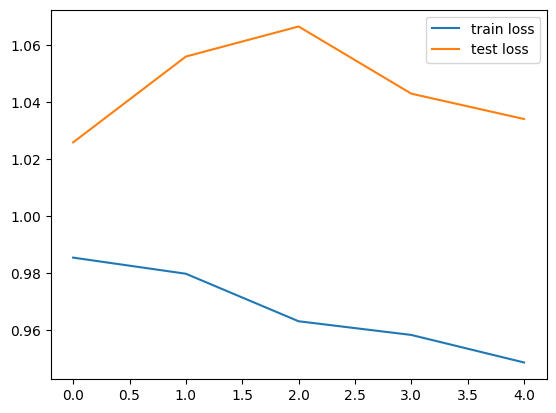

In [56]:
# Plot the loss throughout the training
from matplotlib import pyplot as plt
# plot history
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='test loss')
plt.legend()

In [61]:
test_loss, test_acc = classifier.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 218.7574 - accuracy: 0.4463
test_acc: 0.4462999999523163 test_loss 218.75743103027344


In [64]:
history3.history

{'loss': [0.9854961633682251,
  0.9798374772071838,
  0.9631547927856445,
  0.9583479166030884,
  0.9486839771270752],
 'accuracy': [0.6528599858283997,
  0.6545400023460388,
  0.6602399945259094,
  0.6625999808311462,
  0.6679199934005737],
 'val_loss': [1.0259531736373901,
  1.0560861825942993,
  1.0666451454162598,
  1.0430551767349243,
  1.0341578722000122],
 'val_accuracy': [0.6371999979019165,
  0.6327999830245972,
  0.6251999735832214,
  0.6407999992370605,
  0.6373999714851379]}

In [65]:
classifier.fit_generator(
    training_set,
    epochs = 5,
    validation_data = test_set
)

C:\Users\silvh\AppData\Local\Temp\ipykernel_30356\1381674553.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/5
782/782 [==============================] - 117s 150ms/step - loss: 0.9468 - accuracy: 0.6659 - val_loss: 1.0313 - val_accuracy: 0.6405
Epoch 2/5
782/782 [==============================] - 86s 109ms/step - loss: 0.9436 - accuracy: 0.6692 - val_loss: 1.0308 - val_accuracy: 0.6396
Epoch 3/5
782/782 [==============================] - 85s 109ms/step - loss: 0.9322 - accuracy: 0.6726 - val_loss: 1.0219 - val_accuracy: 0.6496
Epoch 4/5
782/782 [==============================] - 69s 88ms/step - loss: 0.9268 - accuracy: 0.6734 - val_loss: 1.0765 - val_accuracy: 0.6328
Epoch 5/5
782/782 [==============================] - 92s 117ms/step - loss: 0.9190 - accuracy: 0.6755 - val_loss: 1.0095 - val_accuracy: 0.6497


In [66]:
test_loss, test_acc = classifier.evaluate(test_images, test_labels) 
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 243.5209 - accuracy: 0.4336
test_acc: 0.4336000084877014 test_loss 243.5209197998047


In [113]:
classifier.fit_generator(
    training_set,
    epochs = 1,
    validation_data = test_set
)
test_loss, test_acc = classifier.evaluate(test_set) 
print('test_acc:', test_acc, 'test_loss', test_loss)

C:\Users\silvh\AppData\Local\Temp\ipykernel_30356\22545441.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


157/157 [==============================] - 1s 7ms/step - loss: 1.0087 - accuracy: 0.6535
test_acc: 0.6535000205039978 test_loss 1.0086593627929688


: 

In [71]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               102528    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 104,714
Trainable params: 104,714
Non-trainable params: 0
________________________________________________

In [96]:
print(test_images.shape)
print(test_images[0].shape)
print(test_images[1].shape)
print(test_images[2].shape)
classifier.predict(test_images).shape

(10000, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [110]:
# Predict for the first few images in test set
for i in range(8):
    print('Predicted: ',classifier.predict(test_images[i:i+1]))
    print('True label: ', test_labels[i])

1/1 [==============================] - 0s 38ms/step
Predicted:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
True label:  [3]
1/1 [==============================] - 0s 27ms/step
Predicted:  [[0.00000e+00 6.37212e-38 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00]]
True label:  [8]
1/1 [==============================] - 0s 30ms/step
Predicted:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
True label:  [8]
1/1 [==============================] - 0s 38ms/step
Predicted:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
True label:  [0]
1/1 [==============================] - 0s 33ms/step
Predicted:  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  9.9997783e-01 2.2190585e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
True label:  [6]
1/1 [==============================] - 0s 38ms/step
Predicted:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
True label:  [6]
1/1 [==============================] - 0s 30ms/step
Predicted:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
True lab

In [108]:
classifier.predict(test_images[0])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/conv2d_1/Relu' defined at (most recent call last):
    File "c:\ProgramData\Anaconda3\envs\cloudEnv\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\Anaconda3\envs\cloudEnv\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\Anaconda3\envs\cloudEnv\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\ProgramData\Anaconda3\envs\cloudEnv\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\ProgramData\Anaconda3\envs\cloudEnv\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\silvh\AppData\Local\Temp\ipykernel_30356\636933745.py", line 1, in <module>
      classifier.predict(test_images[0])
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_1/Relu'
input must be 4-dimensional[32,32,3]
	 [[{{node sequential_1/conv2d_1/Relu}}]] [Op:__inference_predict_function_154435]